# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
# from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | keren
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | motygino
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | nanao
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | shenjiamen
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | nantucket
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | pelabuhanratu
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | alotau
City not found. Skipping...
Processing 

Processing Record 38 of Set 4 | porto novo
Processing Record 39 of Set 4 | susuman
Processing Record 40 of Set 4 | koulikoro
Processing Record 41 of Set 4 | say
Processing Record 42 of Set 4 | zhosaly
Processing Record 43 of Set 4 | al hindiyah
Processing Record 44 of Set 4 | prachuap khiri khan
Processing Record 45 of Set 4 | rosa zarate
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | hilo
Processing Record 49 of Set 4 | darwin
Processing Record 0 of Set 5 | la'ie
Processing Record 1 of Set 5 | labytnangi
Processing Record 2 of Set 5 | ar ruways
Processing Record 3 of Set 5 | inekar
City not found. Skipping...
Processing Record 4 of Set 5 | callao
Processing Record 5 of Set 5 | mananara
Processing Record 6 of Set 5 | paka
Processing Record 7 of Set 5 | aasiaat
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | labrador city
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | haf

City not found. Skipping...
Processing Record 28 of Set 8 | kuantan
Processing Record 29 of Set 8 | homer
Processing Record 30 of Set 8 | kotlas
Processing Record 31 of Set 8 | zhangye
Processing Record 32 of Set 8 | sarangani
Processing Record 33 of Set 8 | codajas
Processing Record 34 of Set 8 | armacao de buzios
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | douglas
Processing Record 37 of Set 8 | tirumullaivasal
Processing Record 38 of Set 8 | tobi village
City not found. Skipping...
Processing Record 39 of Set 8 | muzaffarpur
Processing Record 40 of Set 8 | tevragh zeina
City not found. Skipping...
Processing Record 41 of Set 8 | chonchi
Processing Record 42 of Set 8 | bardai
Processing Record 43 of Set 8 | lerwick
Processing Record 44 of Set 8 | al bardiyah
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | manuel ojinaga
City not found. Skipping...
Processing Record 47 of Set 8 | weno
Processing Record 48 of Set 8 | lesosibirsk


Processing Record 14 of Set 12 | kirensk
Processing Record 15 of Set 12 | muroto-misakicho
Processing Record 16 of Set 12 | santiago de cao
Processing Record 17 of Set 12 | kabare
Processing Record 18 of Set 12 | rongelap
Processing Record 19 of Set 12 | rosetta
Processing Record 20 of Set 12 | steinbach
Processing Record 21 of Set 12 | oriximina
Processing Record 22 of Set 12 | corumba
Processing Record 23 of Set 12 | ciudad del este
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | kudahuvadhoo
Processing Record 26 of Set 12 | saint-denis
Processing Record 27 of Set 12 | puerto baquerizo moreno
Processing Record 28 of Set 12 | thinadhoo
Processing Record 29 of Set 12 | mar del plata
Processing Record 30 of Set 12 | hassi messaoud
Processing Record 31 of Set 12 | carutapera
Processing Record 32 of Set 12 | bryne
Processing Record 33 of Set 12 | arteche
Processing Record 34 of Set 12 | vernon
Processing Record 35 of Set 12 | mancio lima
Processing Record 36 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,66.60,88,75,21.99,PT,1685710753
1,keren,15.7778,38.4581,86.68,31,82,9.26,ER,1685710754
2,adamstown,-25.0660,-130.1015,75.09,87,97,22.77,PN,1685710754
3,bethel,41.3712,-73.4140,79.45,68,0,0.00,US,1685710754
4,motygino,58.1831,94.7592,70.61,58,88,4.70,RU,1685710754


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,88,75,21.99,PT,1685710753
1,keren,15.7778,38.4581,86.68,31,82,9.26,ER,1685710754
2,adamstown,-25.0660,-130.1015,75.09,87,97,22.77,PN,1685710754
3,bethel,41.3712,-73.4140,79.45,68,0,0.00,US,1685710754
4,motygino,58.1831,94.7592,70.61,58,88,4.70,RU,1685710754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

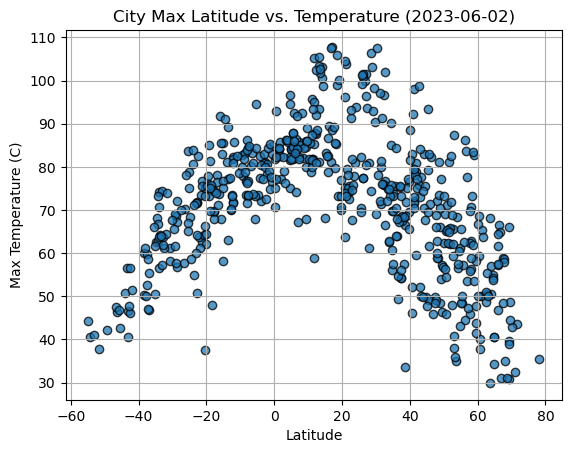

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-06-02)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

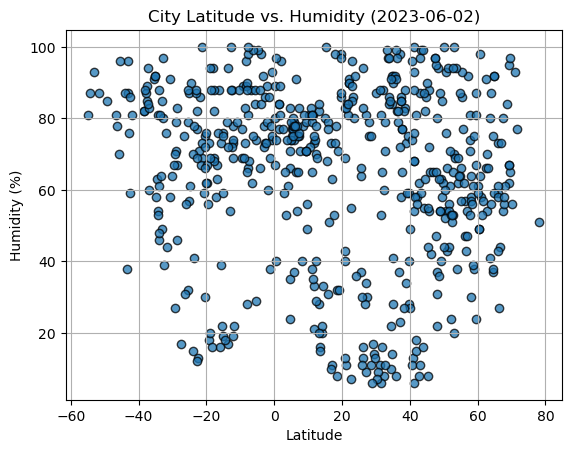

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-06-02)")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

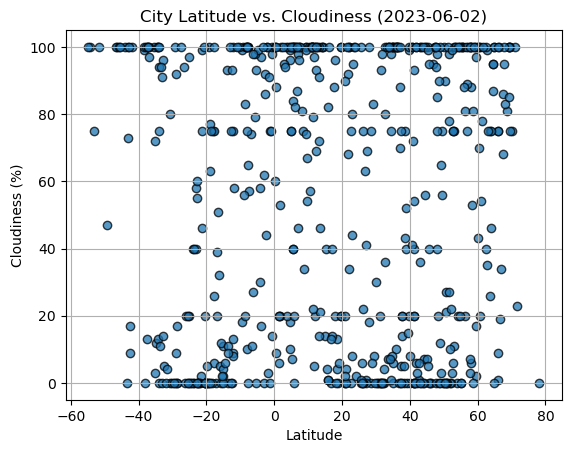

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-06-02)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

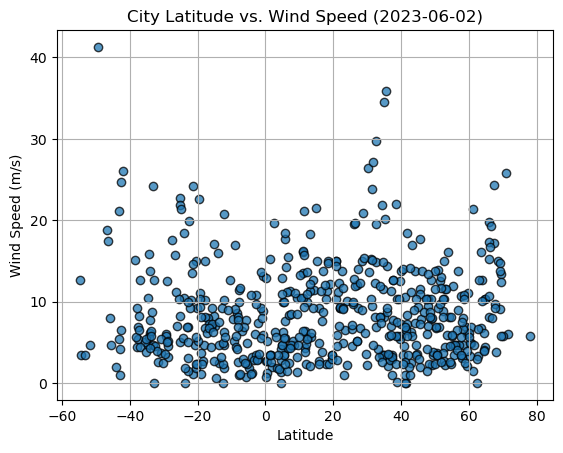

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-06-02)")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,88,75,21.99,PT,1685710753
1,keren,15.7778,38.4581,86.68,31,82,9.26,ER,1685710754
3,bethel,41.3712,-73.4140,79.45,68,0,0.00,US,1685710754
4,motygino,58.1831,94.7592,70.61,58,88,4.70,RU,1685710754
6,petropavlovsk-kamchatsky,53.0452,158.6483,37.99,100,100,4.47,RU,1685710755


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,75.09,87,97,22.77,PN,1685710754
5,port-aux-francais,-49.3500,70.2167,42.10,85,47,41.29,TF,1685710755
7,puerto natales,-51.7236,-72.4875,37.85,87,100,4.61,CL,1685710514
12,port mathurin,-19.6833,63.4167,76.15,62,0,22.55,MU,1685710756
13,grytviken,-54.2811,-36.5092,40.66,87,100,3.47,GS,1685710756


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.48927438669276213


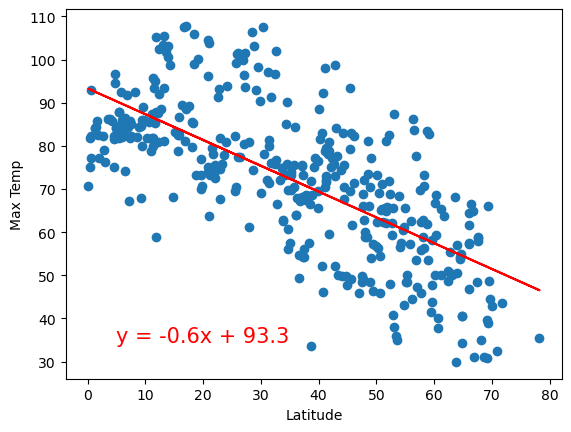

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6193845611017323


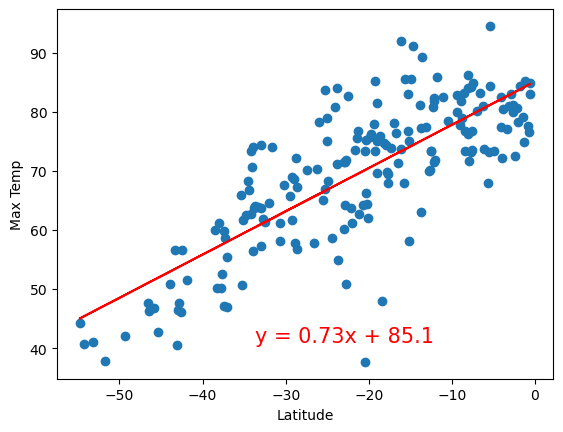

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** 

Northern Hemisphere: 
* The relationship between latitude and max tempuratures displays a weak negative correlation
* The r-value is around 0.49 
* Max temperature drops as the latitude increases

Southern Hemisphere: 
* The relationship between latitude and max tempuratures displays a strong positive correlation
* The r-value is around 0.62 
* Max temperature increases as the latitude increases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0005166581351241063


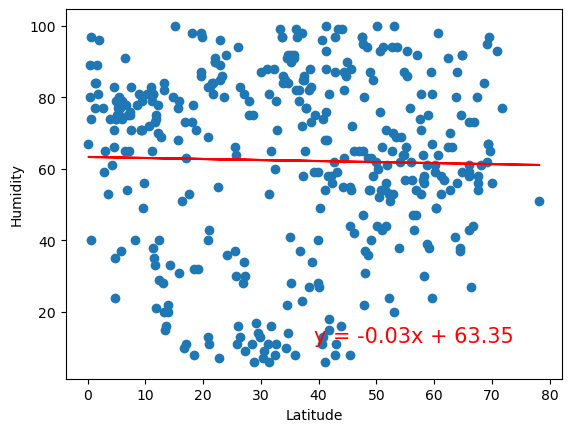

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.000996349892169373


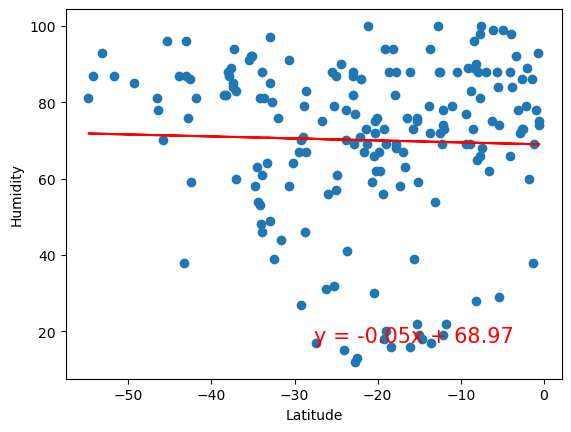

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** 

Northern Hemisphere:
* There is no correlation between latitude and humidity
* The r-value is around 0.00052

Southern Hemisphere:
* There is no correlation between latitude and humidity
* The r-value is around 0.000996

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007384604113366484


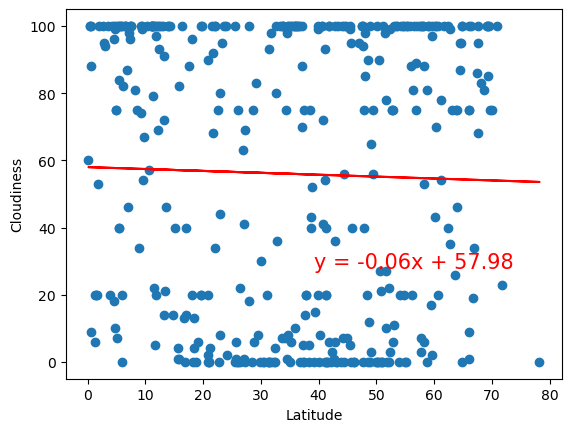

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.005044437535387455


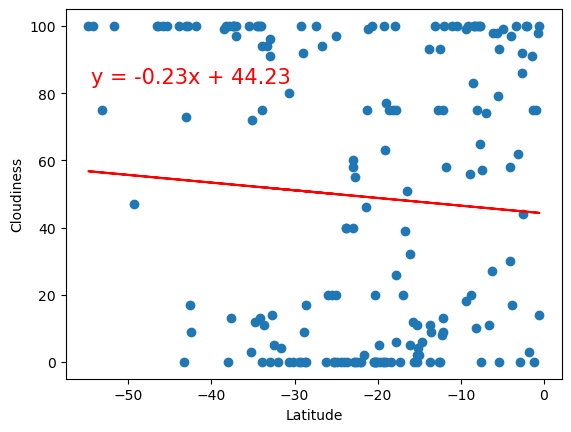

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:**

Northern Hemisphere:

* There is no correlation between Latitude and Cloudliness
* The r-value is around 0.00074

Southern Hemisphere:

* There is no correlation between Latitude and Cloudliness
* The r-value is around 0.0050

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0015877611032245127


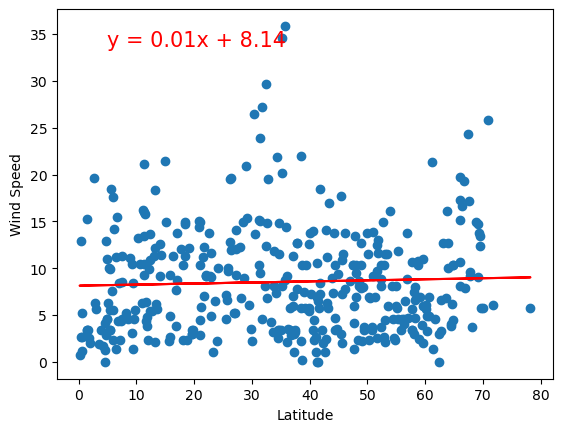

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.0408100766496132


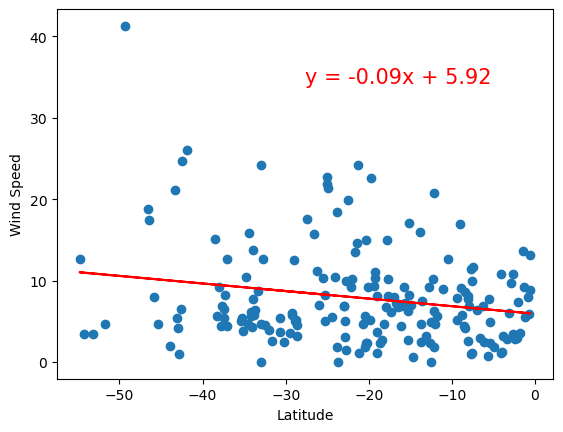

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:**

Northern Hemisphere:

* There is no correlation between Latitude and Wind Speed
* The r-value is around 0.0016

Southern Hemisphere:

* There is no correlation between Latitude and Wind Speed
* The r-value is around 0.041